# You Do the Maths With Numpy

## Part 1: an introduction to the numpy array

### What we already know
- basic data types (ints, floats, strings, booleans)
- Some functions and methods to manipulate these data types (i.e. type(), len(), str.upper())
- where to put our data (Variables, Lists, Dictionaries
- and how to manipulate and build these variables and lists
- How to create, store, and use data in a dictionary
- Use conditional statements to allow the computer to choose when to execute certain commands
- use loops so that the computer can repeat the brilliant code you have written for it
- Made your own functions!

__Learning Objectives__:

- learn how to use Numpy, and it's Flagship Product, the Numpy Array!
    - Find out that it works a lot like a list
    - It just happens to follow a few more rules
- Learn how to slice and index numpy Arrays
- Learn how to build multidimensional Arrays
- Learn how Numpy adds arrays of different shapes via Broadcasting
- Google some Numpy Methods
    

### Lists are kind of like excel columns Right? 
Wouldn't it be nice to just add the elements of our lists together?

In [ ]:
# lets just add these two guys together
xs = [1,2,3,4,5]
ys = [100,200,300,400,500]
xs+ys

uh oh! looks like + just means append the two lists together in python

In [ ]:
"kind of "+"like"+" strings!"

** We could use a for loop **

In [ ]:
xs = [1,2,3,4,5]
ys = [100,200,300,400,500]
zs = []
for x in range(len(xs)-1):
    z = xs[x]+ys[x]
    zs.append(z)
    
print(zs)

In [ ]:
#or a one liner list comprehension
z = [x+y for x, y in zip(xs,ys)]
z

#### Opinion: I find that bloody annoying, and not as easy to read as a + b

- and since Python is just as much about readibility and ease
- Much smarter people than I have invented numpy to make Python Maths Great again!!

In [9]:

import numpy as np # Note the as np part means I have given this package a nickname

## Introducing the numpy Array

The numpy.array() method coerces a data object into a numpy array, you can chuck a list in there to get a numpy array

In [ ]:
xar = np.array(xs)
yar = np.array(ys)

zar = xar+yar

zar

### Numpy arrays are Python's package for doing vectorized mathematics and operations

**Vector** is just an ordered stack of numbers to crunch, where as base Python can only do math with ** Scalars** or individual Numbers

![](Pictures/vectorized_maths.png)

**However,** numpy arrays have more rules to live by, i.e. they really need all of the same data type to be useful

In [ ]:

test = [1,2,'3']
test_ar = np.array(test)

print('type for item 0 = ', type(test_ar[0]), 'however in the list it is still a',type(test[0]))
print('type for item 2 = ', type(test_ar[2]),'however in the list it is still a',type(test[2]))

### Numpy Arrays have lots of bells and whistles, but the cost is that they must follow some more rules than a list

** Pros**: 
- Element wise mathematics
- Multiple Dimensions
- smaller data file sizes usually


** Cons **
- Entries are coerced into one datatype
- not  as flexible as a List
- Numpy has its own brand of numbers and string data types, I recommend coercing everything into a numpy data type to avoid problems

### Numpy Data Types
- int32, int64
- float32, float64
- np.str

In [ ]:
# we can force this data type to be numbers, and umpy will successfully coerce it into being a number,hurray!!
test = [1,2,'3']
test_ar = np.array(test, dtype = np.int64)
type(test_ar[0])

** Making of a numpy  Array**

In [ ]:
#from a list
a_ar = np.array([1,2,3,4])
print('list to array', a_ar)
#from a myriad of array generating functions in Numpy

nil_ar = np.zeros(4)
print('array of emu eggs',nil_ar, 'of shape %i and data type' %(nil_ar.shape), nil_ar.dtype)

range_ar =np.arange(3,13,3)
print('numpys version of a range with a spacing of 3',range_ar)

** Just like lists**
- They are mutable
- iterable
- indexible
- and need to be copied properly!!

In [ ]:
#making a new nickname for 
nil_copy = nil_ar

#making an actual copy
nil_real_copy = nil_ar.copy()

nil_ar[0] = 2

for nils in nil_ar:
    if nils >0:
        print(nils)

print('original array',nil_ar)
print('fake copy',nil_copy)
print('real copy',nil_real_copy)


**And...** you can  slice it up just like a list, the result of each slice is a numpy array

In [ ]:

range_ar[:-1]-a_ar[0:-1]

### with improved slicing
- via start:stop:step

In [ ]:
test_range = np.arange(20)
print('full array', test_range)
print('every third element between the 1st and the 15th elements:', test_range[4:15:3])
print('stepping through the entire vector every 5th element', test_range[::5])

### You can even "slice" with a list of indices

array[[1,2,8,9]]

In [ ]:
print(' full range', test_range)
print('3rd, 7th, 11th, 13th, and 17th elements selected', test_range[[3,7,11,13,17]])


### Now lets show how they are not like lists:
- They have different issues with pet_peeve 2, in order to save data
- They can have multiple dimensions

### `Pet_peeve[2]` Revisited - *Copying* arrays vs *viewing* arrays

#### Depending on how you slice an array, you may be making a VIEW and not a COPY of the array.
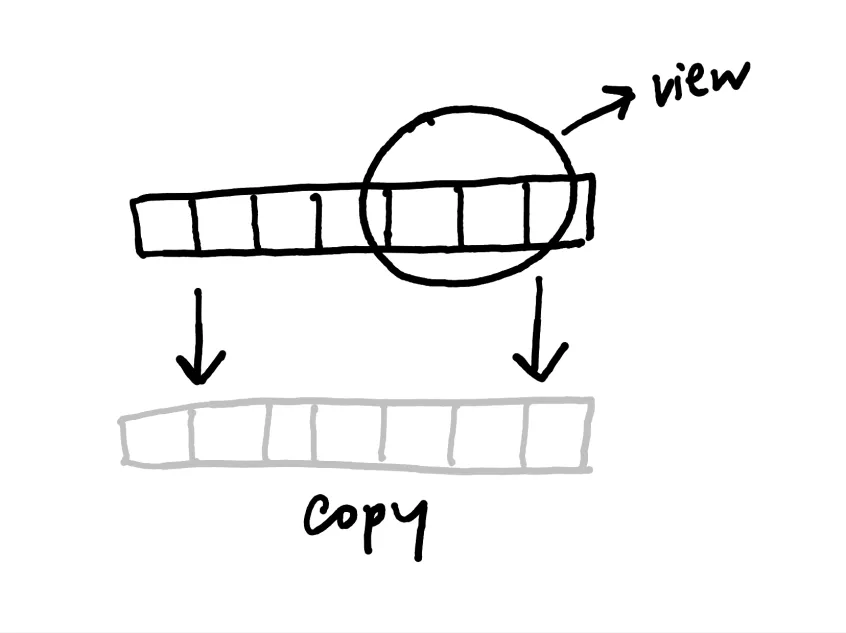

https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/

 **With Lists list[:] and list.copy() both work**

In [7]:
odds = [1,2,3,4]

odds2 = odds # THis does not create a copy

odds3 = odds[:] 
odds4 = odds.copy()

odds[1] = 100

print('odds:', odds, 'and \nodds2:', odds2, '\nboth change')
print('while..\nodds3:',odds3, 'and \nodds4:', odds4, "\ndon't change")

odds: [1, 100, 3, 4] and 
odds2: [1, 100, 3, 4] 
both change
while..
odds3: [1, 2, 3, 4] and 
odds4: [1, 2, 3, 4] 
dont change change


**With Numpy Arrays array[:] DOES NOT WORK, use array.copy()**

In [12]:
odds = np.array([1,2,3,4])

odds2 = odds # THis does not create a copy

odds3 = odds[:] 
odds4 = odds.copy()

odds[1] = 100

print('odds:', odds, 'and \nodds2:', odds2, '\nboth change')
print('while..\nodds3:',odds3, 'ALSO changes because its a view of odds 1 and\nodds4:', odds4, "\ndoesn't change change")

odds: [  1 100   3   4] and 
odds2: [  1 100   3   4] 
both change
while..
odds3: [  1 100   3   4] ALSO changes because its a view of odds 1 and
odds4: [1 2 3 4] 
doesn't change change


#### How do I figure out if I made a view or a copy? check the base
syntax:
```python
possible_view_array.base is original_array = True or False
```

In [23]:
odds = np.array([1,2,3,4])

odds2 = odds
odds3 = odds[:] 
odds4 = odds.copy()

print('is odds2 a view?:',odds3.base is odds, '. Not a view? its actually the same thing: ',id(odds2) == id(odds))
print('is odds3 a view?:',odds3.base is odds)
print('is odds4 a view?:',odds4.base is odds)

odds5 = odds3 <4

odds6 = odds3[odds5]

odds6.base is odds3

is odds2 a view?: True . Not a view? its actually the same thing:  True
is odds3 a view?: True
is odds4 a view?: False


False

#### When are views made instead of new arrays?
<style>
td {
  font-size: 50px
}
</style>

|Actions that create views|Actions that create copies|
|:------------------------|-------------------------:|
|- Normal indexing and slicing(`array[0], array[1:5]`)|- Fancy indexing(with a list or a tuple i.e. (`array[[0], array[(1,4,5)]`)|
|- certain special methods `ndarray.ravel()`| - other methods that do this `ndarray.flatten()`|
|-|- changing datatype with array.astype('float64')|
|-|- filtering data with booleans (we will cover this later|


For more information, check this blog: https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/

###  Moving away from Lists: our first multidimensional array hurray!
- THis is great for gridded data (i.e. images, rasters and GIS data etc)

In [ ]:
# kind of like nested lists

nest = [[1,2,3],[4,5,6],[7,8,9]]
print(nest[1][2])

nest_array = np.array(nest)
print(nest_array[1,2])
print(nest_array.shape, 'is the shape of the array')
nest_array

### We can have almost as many dimensions as we want and essentially access them with an index along each 
basically have one set of indices for the columns and the rows (in green) in order to pick out our data
![](Pictures/multi_dim_array.png)

### Key syntax
 Its just like indexing or slicing a list, but each dimension needs its own slicing commands
 
- example_array[dimension 0 index or slice, dimension 1 index or slice,....., dimension n index or slice]


In [ ]:
print(nest_array)
nest_array[1:,0:2]

### Challenge set 1:
We are going to slice up this numpy dataset a few different ways:

In [ ]:
# numpy has a pretty nice function to upload files
rando_data = np.loadtxt('rando_data.csv',delimiter = ',')

In [ ]:
rando_data.shape

#### Lets have a look and sneakily teach you some plotting ;)

- With ```pyplot.imshow()```, it is the easiest way to quickly throw up a heat map of a 2D array

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(rando_data)

**1.1** whats the datatype of the elements in our rando data? 

**1.2** - slice the 15th row into a 1-D vector, and find the maximum value (hint look up np.max()) ***extra credit*** did we create a copy or a view when we took the 15th row of the vector?

**1.3** - create a subarray of every 3rd row (0th dimension) and 4th column (first dimension), what is the shape?  ***extra credit*** did we create a copy or a view?

**1.4** - create a sub-array of the 10th, 13th, and 18th row (along dimension 0)   ***extra credit*** did we create a copy or a view?

**1.5** - add the sub array from 1.2 and 1.5 together, what shape is it? ***extra credit*** did we create a copy or a view?

## Part two: Broadcasting

** What we know already**
- That we pretty much know how to use numpy arrays because they are just like lists
- just need to be cognizant of the data types we put into our arrays
- We learned how to slice a multidimensional array

In [ ]:
test1 = np.arange(8).reshape(2,4)
test2 = np.arange(9,13)
print(test1,'+', test2)
test1+test2


![](Pictures/broadcast_example.png)

### General Broadcasting Rules
When operating between Two arrays, Numpy compares the length of each axis or dimension, and can proceed with calculations if:
- 1.) The two axis lengths are equal
- 2.) one of the axis lengths is 1

These two conditions must be satisfied along every axis

In order to check you just need to line up the shapes of the two numpy arrays with the **Last axis** on the right:

- I.E.
    - Array 1 shape (4x5x8x1)
    - Array 2 shape (8x3)
    

| **Array**  |  **dim[-4]** |  **dim[-3]** | **dim[-2]**  | **dim[-1]**  |
|---|---|---|---|---|
|Array 1   | 4  | 5  | 8  |  1 |
|Array 2  |   |   |  8 |   3|
|   |   |   |   |   |

** Our example**

- test1  (2d array) 2 x 4
- test2  (1d array) (1)  x 4
- result (2d array) 2 X 4

** Challenge 2:** Gain an understanding of the broadcasting rules
For each of the examples below, tell me what the resulting axes lengths will be of the operations

- **2.1** a(4x3) + b(3,)
- **2.2** A(15x3x5) + B(15x1x5)
- **2.3** C(2x1) + D(8x4x3)
- **2.4** E(4x3) + F(4,)
- **2.5** G(4x3) +H(4x1)

### changing the shapes of Arrays to make the Broadcasting work

- array.reshape() method - where you can specify the lengths of each dimension you need
- np.newaxis - an operator that  inserts a new length axis
- inserting a None to create an empty axis

In [ ]:
## Looking at problems 2.4 and 2.5
E = np.zeros((4,3))
print(E)

F = np.arange(4)

print(F)
E+F

In [ ]:
print("using reshape method)",E+F.reshape(4,1))
print('using np.newaxis', E+F[:,np.newaxis])
print('using none',E+F[:,None])

### Challange 2.6

add two arrays  of dimensions (6,5,4) and of dimensions (6,4) together using broadcasting and changing shape as necessary

In [ ]:
I = np.zeros((6,5,4))
J = np.random.randint(2,size=(6,4))



In [ ]:
# all these work


### Part 3: Filtering out data using np.where and some logic

In [ ]:
L = np.array([1,2,3,4,5])

L_bool = L >3
L_bool

In [ ]:
#can use it to grab subsets of data, and to change parts of an array based on conditions
L[L_bool] = 0

L

### np.where is the other way to do it but returns something slightly different

In [ ]:
L_nils = np.where(L is 0)
L_nils

** WTF happened here?**

Python has multiple ways to do logic
- is, and, or all do not do **elementwise** logical operations
- you should use ==, !=. &, | (for elementwise or), ^ (for elementwise exclusive or)


In [ ]:
# the example above didn't work so here is:

### Challenge 3.1:

How many 0's are there in our rando_data?


**Note:** that the where here returns a tuple of two integer arrays, the 0th item in the tuple is a list of the 0 axis indices
of each cell where the condition is true, and the 1st item is an array of the 1st axis indices, that way when you put this
tuple into the brackets to slice up your array, it slices it up as two arrays of indices


### So what about Scipy?

- Scipy is just a collection of additional functions that typically use the numpy array

- And there are Myriads of things you can do with them

- Instead of me explaining how to use them, we will figure them out ourselves!

### I can't show them all to you, but I will show you two examples

#### 1.) Interpolation

In [ ]:
# An example
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y) #creates an interpolation function object to use

In [ ]:
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

#### 2.) Optimization

In [ ]:
from scipy.optimize import minimize

# creating a function of two variables
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

# and some constraints
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
#and some boundaries
bnds = ((0, None), (0, None))

In [ ]:
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)


In [ ]:
res.x


#### Scipy has bunches of subpackages to check out:

https://docs.scipy.org/doc/scipy-1.1.0/reference/

Including Spatial, Image Processing, Linear Algebra(with sparse for big datasets), Signal Processing, the list goes on

## Activity 1: Function/ method show and tell
I am going to give each group a bunch of methods and functions, and they will have 15 minutes to create some  examples, and come up to the class to present them

## Activity 2: Some crackin Numpy Puzzles


**4.1** Create a 8x8 matrix of zeros and fill it with a checkerboard pattern of ones

**4.2** Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates

**4.3** Create a 2d array with 1 on the border and 0 inside

## Activity 3: You are welcome Telstra, we are doing your work for you

We are going to be given 1000 coordinate positions of homes, and we need to know the straight line distance from these positions to a set of coordinates for the Cell phone towers in the area to assess how good the coverage is

** Hint** this is a good place to practice your broadcasting skills

In [ ]:
Home_locations = np.random.randint(0,10000,size = (2,1000)) #a (2,1000) 2-D integer
cell_towers = np.random.randint(0,10000,size = (2,10)) #a (2,10 ) 2 -d array the 2 rows pertain to x and y respectively

In [ ]:
# so first part of the calculations is to find X1-Y and X2-Y2 (the two rows in the first dim) broadcasting like:
# Home locations: 2 x (1) x 1000 *note axis in parenthesis added by new axis
# Cell Towers:    2 x 10  x (1)


In [ ]:
# euclidean distance = sqrt((x1-y1)**2 +(y1-y2)**2)
# here we are squaring our (x1-x2) diff[0,:,:] and our (y1-y2) or diff[1,:,:] then summing them along the 0th axis 
# then we are taking that sum and square rooting it


In [ ]:
#Arg min is grabbing the index (along axis 0) of the lowest distance, vis a vis the closest station



In [ ]:
  #This data set would be much better as a Pandas dataframe fyi